In [ ]:
#!pip install pandas matplotlib seaborn plotly
#!pip install --upgrade pandas seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('https://github.com/itzelduranv/Optativa7Semestre/raw/refs/heads/main/NetFlix.csv', sep=',')

In [3]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


## Conversion de Variables

Para la fecha

In [4]:
print(df['date_added'].head())

0    14-Aug-20
1    15-Dec-17
2     5-Jan-19
3     1-Mar-16
4     3-Dec-18
Name: date_added, dtype: object


In [5]:
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError:
    df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

<ipython-input-5-a546218f1427>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [ ]:
print(df['date_added'].dtype)

datetime64[ns]


In [ ]:
print(df['date_added'].head())

print(df['date_added'].isna().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


Para rating

In [6]:
#Definir un diccionario de mapeo de ratings
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4
}

In [7]:
#Crear una nueva columna con los valores convertidos
df['rating_numeric'] = df['rating'].map(rating_map)

In [8]:
#Mostrar las primeras filas para verificar la conversion
print(df[['rating', 'rating_numeric']].head())

#Obtener estadisticas basicas de la nueva columna
print(df['rating_numeric'].describe())


  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7685.000000
mean        3.154066
std         0.936116
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0


## Estadistica descriptiva para variable numericas





In [16]:
numeric_columns = ['release_year', 'rating_numeric', 'duration']
print('Estadisticas descriptivas para variables numericas')

print(df[numeric_columns].describe())

Estadisticas descriptivas para variables numericas
       release_year  rating_numeric     duration
count   7787.000000     7685.000000  7787.000000
mean    2013.932580        3.154066    69.122769
std        8.757395        0.936116    50.950743
min     1925.000000        1.000000     1.000000
25%     2013.000000        3.000000     2.000000
50%     2017.000000        3.000000    88.000000
75%     2018.000000        4.000000   106.000000
max     2021.000000        5.000000   312.000000


# Medidas de tendencia central

In [17]:
print("\Medidas de tendencia central para variables numericas: ")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Media: {df[column].mean():.2f}")
    print(f"Mediana: {df[column].median():.2f}")
    print(f"Moda: {df[column].mode().values[0]:.2f}")

\Medidas de tendencia central para variables numericas: 

release_year:
Media: 2013.93
Mediana: 2017.00
Moda: 2018.00

rating_numeric:
Media: 3.15
Mediana: 3.00
Moda: 4.00

duration:
Media: 69.12
Mediana: 88.00
Moda: 1.00


# Estadisticas para variables categoricas

In [18]:
categorical_columns = ['type','rating','genres']
print("\n Estadisticas para variables categoricas")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print(f"Moda: {df[column].mode().values[0]}")


 Estadisticas para variables categoricas

type:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda: Movie

rating:
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda: TV-MA

genres:
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1


# Estadisticas para la columna de fecha

In [19]:
print("\nEstadisticas para la columna de fecha")
print(f"Fecha minima: {df['date_added'].min()}")
print(f"Fecha maxima: {df['date_added'].max()}")
print(f"Rango de fechas: {df['date_added'].max()- df['date_added'].min()}")


Estadisticas para la columna de fecha
Fecha minima: 2008-01-01 00:00:00
Fecha maxima: 2021-01-16 00:00:00
Rango de fechas: 4764 days 00:00:00


In [20]:
#Conteo de valores unicos para otras columnas de objeto
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores unicos para otras columnas de objeto")
for column in object_columns:
    print(f"\n{column}: {df[column].nunique()} valores unicos")


Conteo de valores unicos para otras columnas de objeto

show_id: 7787 valores unicos

title: 7787 valores unicos

director: 4049 valores unicos

cast: 6831 valores unicos

country: 681 valores unicos

description: 7769 valores unicos


# **GRAFICOS**

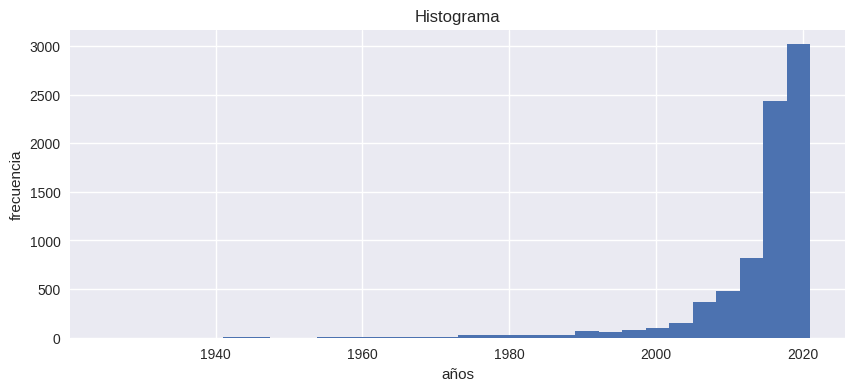

In [21]:
datos= df.release_year

plt.figure(figsize=(10,4))
plt.hist(datos,bins=30)
plt.title('Histograma')
plt.xlabel('años')
plt.ylabel('frecuencia')
plt.show()

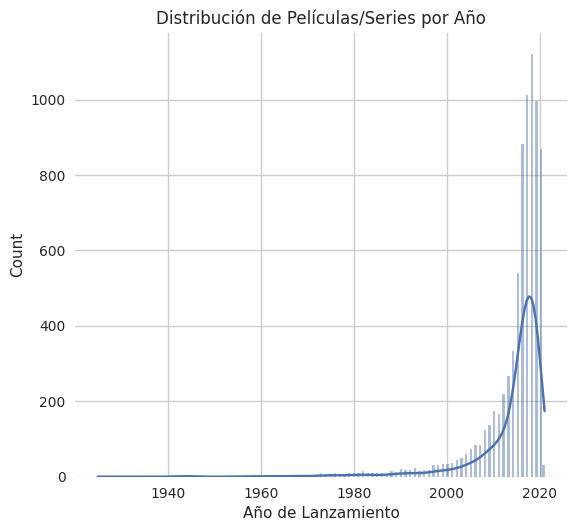

In [22]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')

plt.tight_layout()
plt.show()

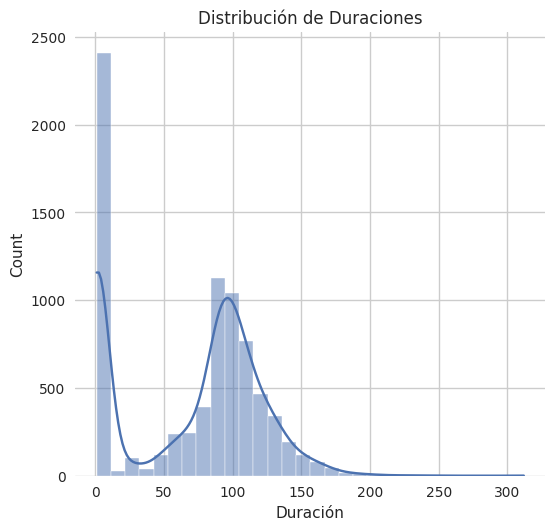

In [23]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 2)
sns.histplot(df['duration'], kde=True)
plt.title('Distribución de Duraciones')
plt.xlabel('Duración')


plt.tight_layout()

plt.show()

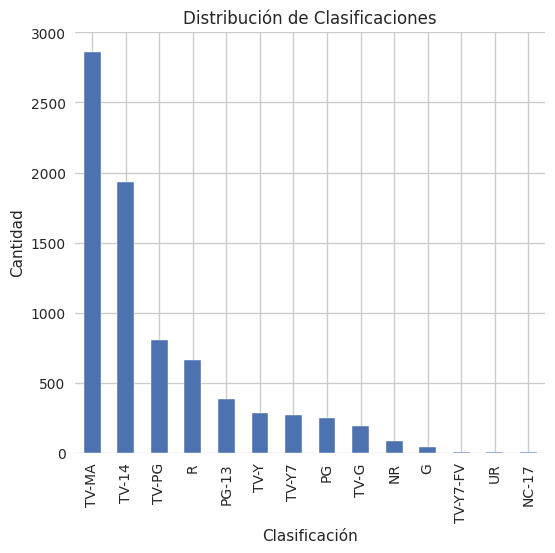

In [24]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución de Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()

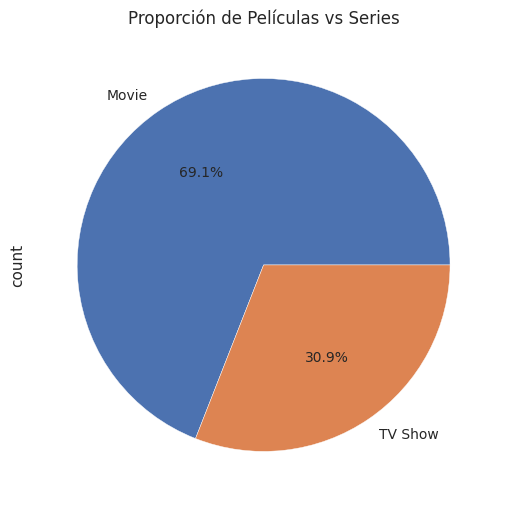

In [25]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Películas vs Series')


plt.tight_layout()
plt.show()

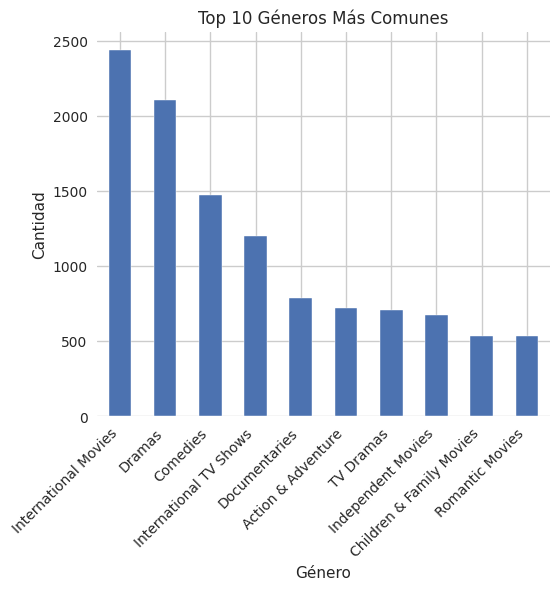

In [26]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

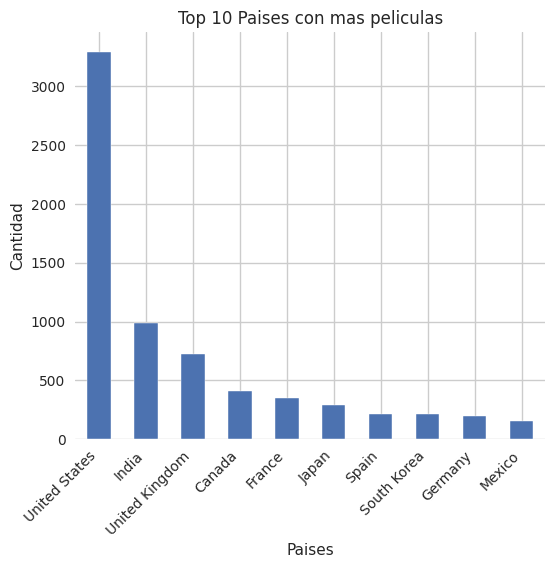

In [27]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['country'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Paises con mas peliculas')
plt.xlabel('Paises')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## **AVANZADOS**

In [10]:
#Configuración general de estilo
plt.style.use('seaborn')
sns.set_palette('deep')

<ipython-input-10-5f31c07cc394>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


1. Scatter plot de release_year vs duration

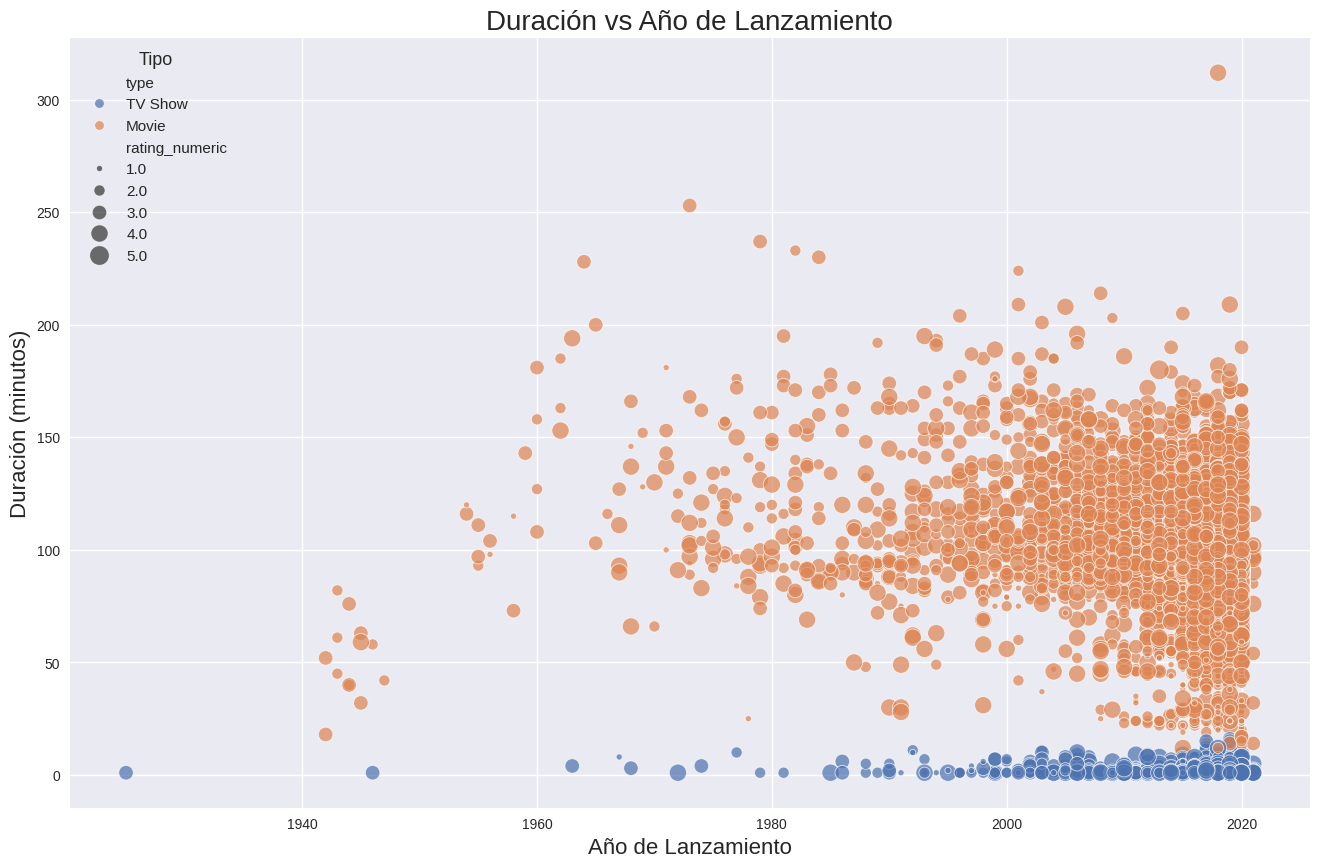

In [11]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='release_year', y='duration', hue='type', size='rating_numeric', sizes=(20, 200), alpha=0.7)
plt.title('Duración vs Año de Lanzamiento', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.legend(title='Tipo', title_fontsize='13', fontsize='11')
plt.show()

2. Box plot de duración por tipo de pelicula

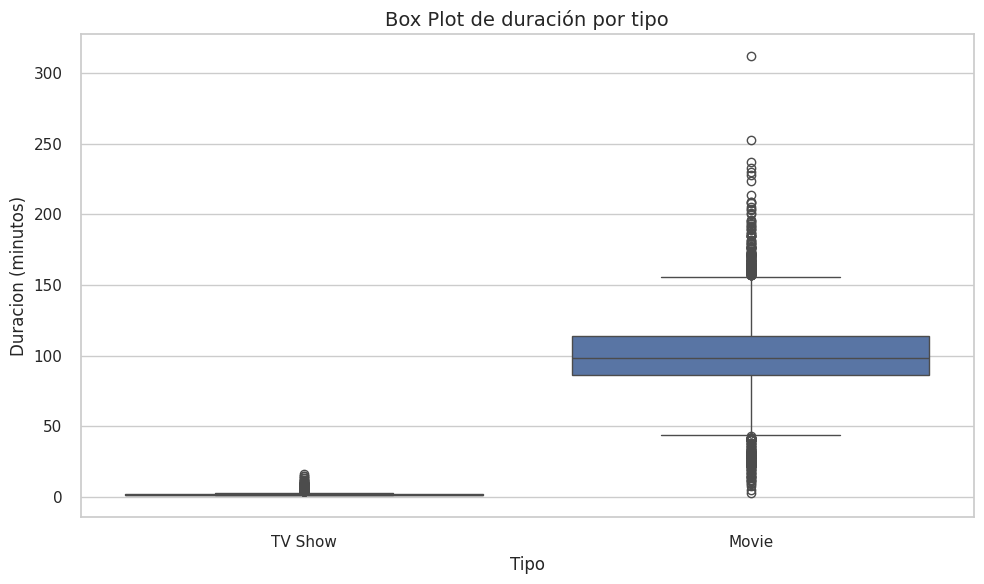

In [29]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(data=df, x='type', y='duration')
plt.title('Box Plot de duración por tipo', fontsize=14)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Duracion (minutos)', fontsize=12)
plt.tight_layout()
plt.show()

3. Heatmap que correlaciona variables numericas

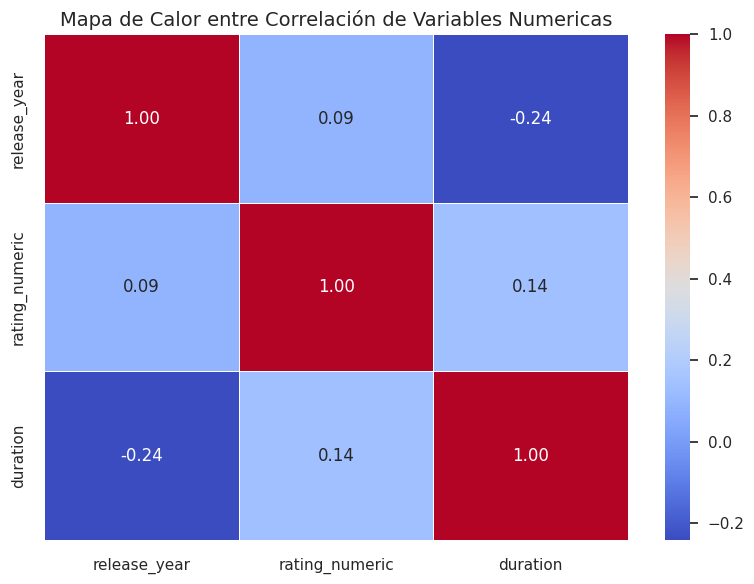

In [36]:
datos_numericos = df[['release_year', 'rating_numeric', 'duration']]

correlation_matrix = datos_numericos.corr()

plt.figure(figsize=(8, 6))
sns.set(style="white")

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Mapa de Calor entre Correlación de Variables Numericas', fontsize=14)

plt.tight_layout()
plt.show()

4. Grafico de lineas de rating promedio en relacion al año de lanzamiento

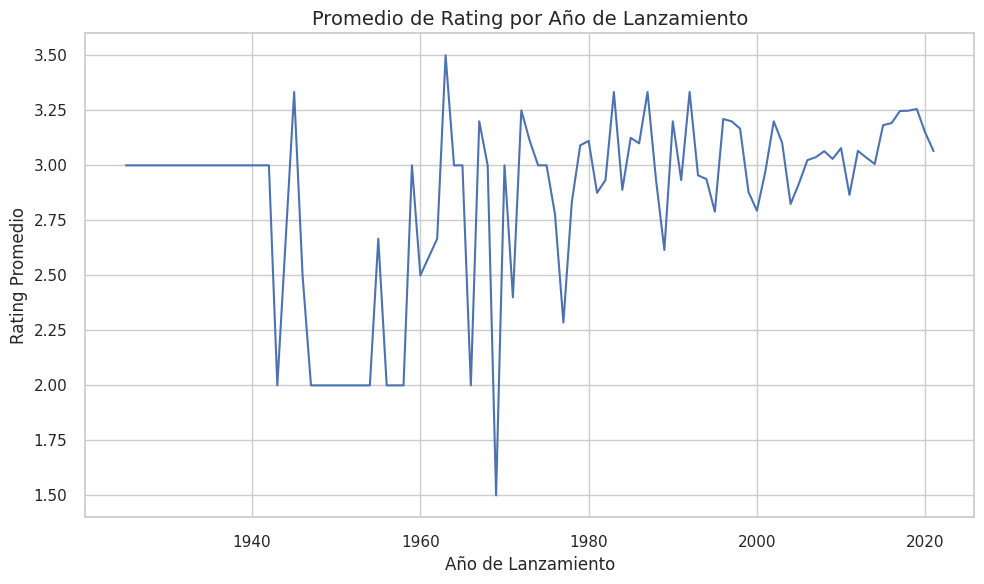

In [34]:
promedio_rating_año = df.groupby('release_year')['rating_numeric'].mean().dropna()

plt.figure(figsize=(10, 6))
plt.plot(promedio_rating_año.index, promedio_rating_año.values)


plt.title('Promedio de Rating por Año de Lanzamiento', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Rating Promedio', fontsize=12)


plt.tight_layout()
plt.show()

5. Grafico de Lineas de Tendencias de los 5 Principales Generos a lo Largo de los Años

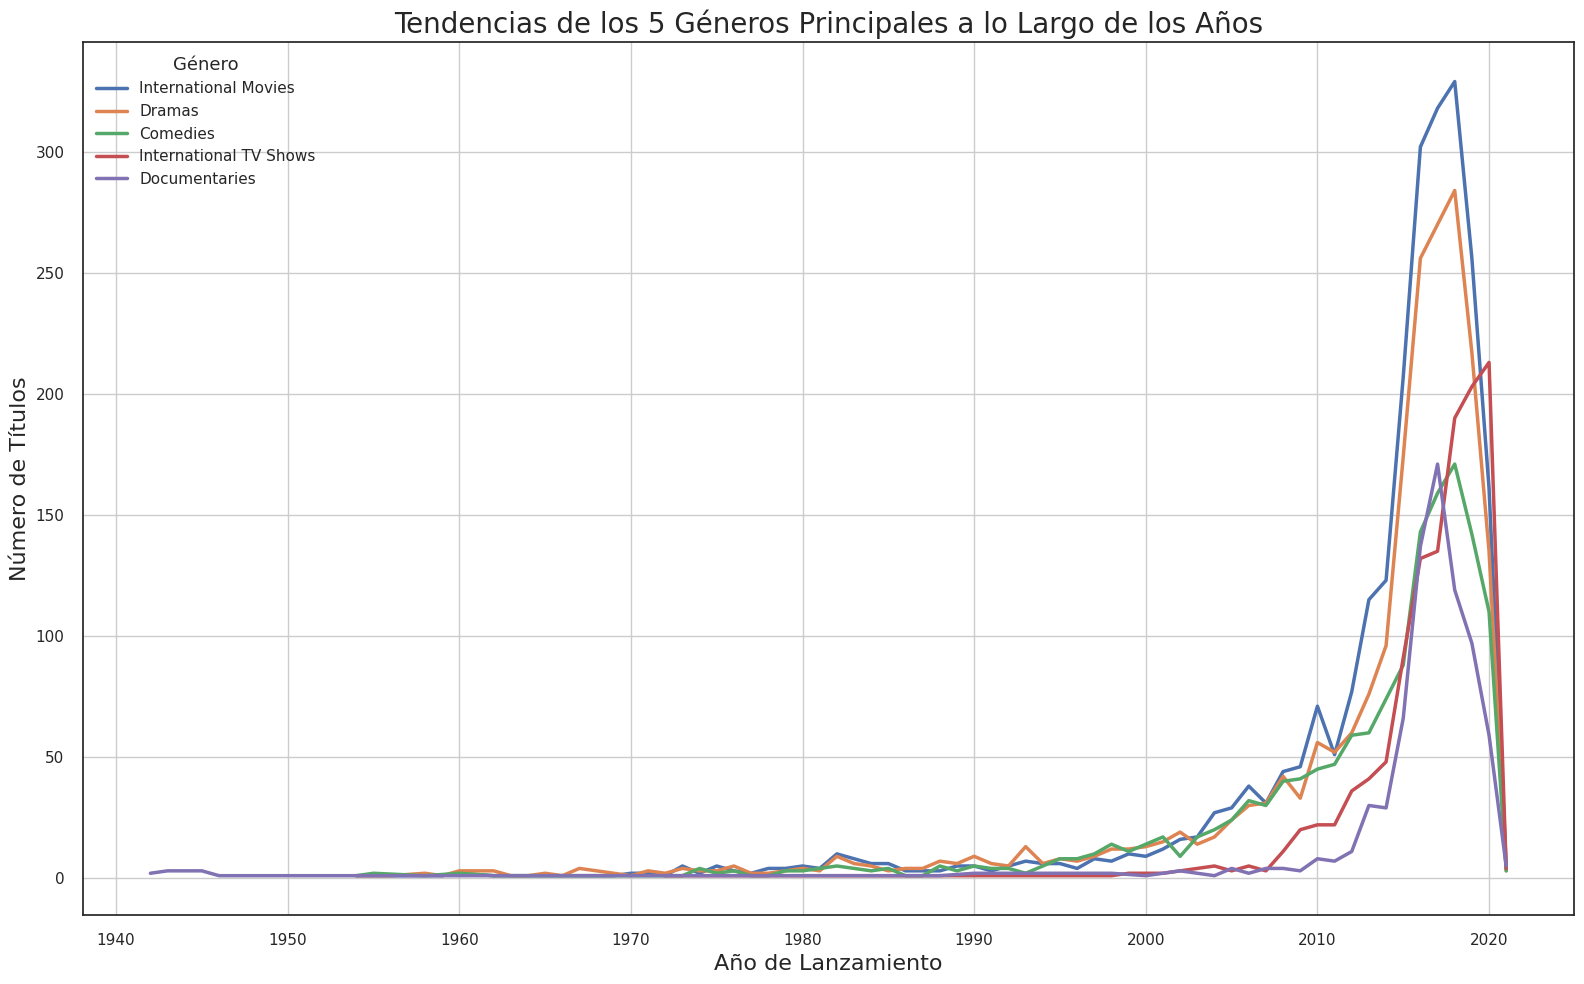

In [38]:
df['genres'] = df['genres'].str.split(', ')
genres_df = df.explode('genres')

top_genres = genres_df['genres'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 10))
for genre in top_genres:
    genre_data = genres_df[genres_df['genres'] == genre].groupby('release_year').size()
    plt.plot(genre_data.index, genre_data.values, label=genre, linewidth=2.5)

plt.title('Tendencias de los 5 Géneros Principales a lo Largo de los Años', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Número de Títulos', fontsize=16)
plt.legend(title='Género', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()